# Using convolution neural network with image augmentation to classify fruit images
This kernel is a continuation of **https://www.kaggle.com/rehanali88/kaggle-for-deep-learning-p-1-getting-data-ready**. In that kernel we had split the data in to training, validation and test data sets. Then we constructed a new kernel to build a simple convolution neural network. To resolve the issues encountered, we will use convolution neural network with image augmentation. The output of  **https://www.kaggle.com/rehanali88/kaggle-for-deep-learning-p-1-getting-data-ready** and **https://www.kaggle.com/rehanali88/kaggle-for-deep-learning-p-2-simple-convnet** will be our input data.   
    
We will use keras library to build a convolution neural network with image augmentation to classify fruit images into different categories. 

## Required steps
**The steps required before we build our model are the same as performed in the https://www.kaggle.com/rehanali88/kaggle-for-deep-learning-p-2-simple-convnet kernel. For a detailed explanation of these steps please take a look at that notebook. Here these steps are under the heading 'Required steps' and are performed in a single notebook cell.**

In [1]:
## importing required packages

# the following line will make plots appear with out calling plt.show()
%matplotlib inline

import numpy as np # linear algebra
import matplotlib.pyplot as plt # basic plotting
import pandas as pd # I/O of data sets
from collections import OrderedDict # making ordered dictionaries
import matplotlib.image as im # reading image files
import os, random, shutil # directory operations
from zipfile import ZipFile # woking with zip archives

# keras for deep learning
from keras import layers 
from keras import models 
from keras import optimizers 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

## Extracting the zip files

zp_filenames = ['Testing.zip','Training.zip','Validation.zip']
zp_filenamesWithpath = [os.path.join('../input/kaggle-for-deep-learning-p-1-getting-data-ready',k) for k in zp_filenames] # using list 
#comprehension to build a list for zipped file with their path names.

for k in zp_filenamesWithpath: # looping over the files that need to be unzipped
    # extracting the zipfiles to the current directory
    with ZipFile(k,'r') as zp: 
        zp.extractall()

## Getting parameter values which will be used when the model is built

paths_list = ['working/Validation', 'working/Training', 'working/Test']

dict_num_images = OrderedDict() # creating an ordered dictionary to store number of 
# images
number_classes = [] # creating a list to store number of classes in each data set

for pa in paths_list: # looping over the list with paths to the data sets which we 
# created earlier
    number_classes.append(len(os.listdir(pa))) # appending the number of classes in a 
    # data set to the list number_classes
    nums = 0 # we will store the number of images in each class to this variable
    
    for idx, dr in enumerate(os.listdir(pa)): # looping over the classes in a data set
        nums += (len(os.listdir(os.path.join(pa,dr)))) # appending the number of images
        # in a class to the variable nums
        
    dict_num_images[pa[8:]] = nums # storing number of images in a data set to a 
    # dictionary with key = name of the data set
    
dict_batchsize = OrderedDict() # creating an ordered dictionary to store the batch size
# for each data set
dict_epochno = OrderedDict() # creating an ordered dictionary to store the steps per 
# epoch for each data set
dic_keys = list(dict_num_images.keys()) # creating a list for the names data sets
dic_values = list(dict_num_images.values()) # creating a list for the number of images
# in each data set

for ind,key in enumerate(dic_keys): # looping over the data sets
    
    for nums in range(10,50): # looping over a range of numbers from 10 -50 
        # (these numbers are the potential batch size)
        
        if dic_values[ind]%nums == 0: # checking if the remainder of number of 
            # images/batch size is equal to zero
            dict_batchsize[key] = nums # if the remainder is zero, store the batch size
            # to the dictionary that was created earlier with key equal to the name of  
            # thedata set
            dict_epochno[key] = int(dic_values[ind]/nums) # calculating the steps per 
            # epoch by diving the number of images in a data set by the batch size and 
            # storing the value to the dictionary that was created earlier with key equal
            # to the name of the data set
            break; # as we have found a batch size, we break the loop

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Building and compiling the convolution neural network
Now we build a convolution neural network. We will use a number of convolution + max pooling layers.  We will also add a **drop out layer** before the flatten layer. Lastly, as in our simple ConvNet model, as we have multiple classification labels, we will use sofmax activation for our output layer and the size of the output will be set to the the number of classes for the data set. 
The input shape for the first convolution layer is set to (100, 100, 3), which is the image size of our data.

## Why a drop out layer
The problem that we are trying to solve is our model memorizing patterns. Essesntially, a drop out layer randomly removes a sub set of neurons. We are basically introducing noise to the data so that our model doesn't learn patterns that are not significant.

Building the covnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), 
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), 
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), 
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) # adding a flatten layer
model.add(layers.Dropout(0.5)) # adding a drop out layer
model.add(layers.Dense(512, 
                       activation='relu')) # adding a dense layer
model.add(layers.Dense(np.unique(number_classes)[0], 
                       activation='softmax')) # adding the final layer with outputs
# equal to the number of classes and using softmax as activation

In [3]:
# Checking the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         147584    
__________

Now we compile the model using accuracy as our metric and categorical crossentropy as the loss function as we have multiple classes. The optimizer we will use is the commonly used 'RMSprop'

In [4]:
# Compiling the model with categorical crossentropy for multiclass labels
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Transforming data with data augmentation to use for fitting to the model.
We will use ImageDataGenerator to get the data ready for input to our model. We will scale the image so that pixel values are between 0 and 1.  **More importantly we will use data augmentation for the training images**.  For this we will make a seperate ImageDataGenerator object with additional inputs. 
As we did with the simple ConvNet, we will then use the generator objects to generate batches of images.
We have already calculated the batch size for every data set.

## Why data augmentation
Before moving forward and building our model let's first understand the purpose of data augmentation. We want to overcome overfitting. To do this, one approach we can take is to generate new images from the same dataset that have been transformed in a certain way. This transformation involves image rotation, image shear, image shift etc. Summed up in a word, this process is called 'data augmentation'.    
The following ImageDataGenerator object will create a generator object which will perform data augmentation for us.

In [5]:
# Making an image data generator object with augmentation 
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

## Visualizing data augmentation
We can see data augmentation in action. For this we will chose an image from our data and use 'train_datagen'  to generate augmented images which we will then plot.

First let's use an image to augment. For this example, we will chose an orange from the training data set.

In [6]:
imgs_orange = [os.path.join(paths_list[1],'Orange',img) for img in os.listdir(os.path.join(paths_list[1],'Orange'))] # This list contains 
# names of images in folder named orange

Let's select the first image in the 'Orange' directory' and load it.

In [7]:
img = image.load_img(imgs_orange[0])

Now, we need to perform two steps: 1- Convert the image to a numpy array and 2- reshape the image to 4 dimensions. These steps are required for keras image data generator to be able to generate images.

In [8]:
img_ar = image.img_to_array(img) # convert image to a numpy array
img_ar = img_ar.reshape((1,) + img_ar.shape) # reshape the image

Now, we can see data augmentation in action!

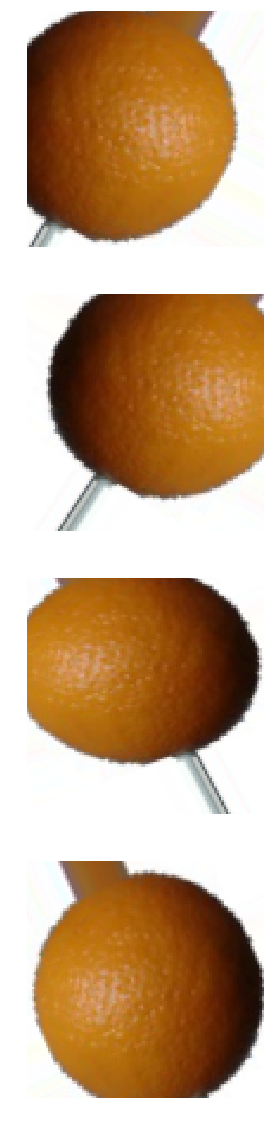

In [14]:
fg, ax = plt.subplots(4, 1, figsize = (20,20)) # creating a figure with 4 subplots
k = 0 # variable for referring to an axis

## using train_datagen to generate randomly transformed images
for batch in train_datagen.flow(img_ar, batch_size=1):
    ax[k].imshow(image.array_to_img(batch[0]))
    ax[k].axis('off')
    k += 1 # updating value of k
    if k == 4: # we only want to see 4 images (we have 4 subplots so lets break if k is equal to 4)
        break
        
fg.savefig('augmentedImages.png')# saving the figure

The images above show data augmentation in action. It is just generation of a number of images by performing random transformations on a single image 

## Moving forward and generating images for training and validation dataset
Now we can use our created 'train_datagen' to generate batches of images for the training data set. But ** we can not use this generator for validation and testing images. These images should not be transformed in any way**. We only need to rescale them so that pixel values are between 0 and 1.

Creating image generator to use for validation and test data set. Here, we only rescale the images.

In [10]:
datagen = ImageDataGenerator(rescale=1./255) 

In [11]:
# Using the generator for training directory
train_generator = train_datagen.flow_from_directory(paths_list[1],
                                              target_size = (100,100),
                                              batch_size=dict_batchsize['Training'],
                                              class_mode='categorical')

Found 34641 images belonging to 69 classes.


In [12]:
# Using the generator validation directory
validation_generator = datagen.flow_from_directory(paths_list[0],
                                                   target_size = (100,100),
                                                   batch_size=dict_batchsize[
                                                       'Validation'],
                                                   class_mode='categorical')

Found 8752 images belonging to 69 classes.


## Fitting the model
Now we are ready to fit the model. We already have calculated all the parameters that we need to input to the fit_generator method.

In [13]:
# Fitting the model using the train_generator
history = model.fit_generator(train_generator,
                              steps_per_epoch=dict_epochno['Training'],
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=dict_epochno['Validation'])

Epoch 1/50
1283/1283 [==============================] - 138s 107ms/step - loss: 2.5153 - acc: 0.2702 - val_loss: 1.2394 - val_acc: 0.5934
Epoch 2/50
1283/1283 [==============================] - 132s 103ms/step - loss: 1.0363 - acc: 0.6565 - val_loss: 0.5181 - val_acc: 0.8319
Epoch 3/50
1283/1283 [==============================] - 133s 103ms/step - loss: 0.6365 - acc: 0.7849 - val_loss: 0.2990 - val_acc: 0.8883
Epoch 4/50
1283/1283 [==============================] - 134s 104ms/step - loss: 0.4592 - acc: 0.8394 - val_loss: 0.2490 - val_acc: 0.9228
Epoch 5/50
1283/1283 [==============================] - 134s 104ms/step - loss: 0.3623 - acc: 0.8736 - val_loss: 0.1596 - val_acc: 0.9378
Epoch 6/50
1283/1283 [==============================] - 133s 104ms/step - loss: 0.2965 - acc: 0.8940 - val_loss: 0.1807 - val_acc: 0.9241
Epoch 7/50
1283/1283 [==============================] - 134s 104ms/step - loss: 0.2520 - acc: 0.9111 - val_loss: 0.1597 - val_acc: 0.9277
Epoch 8/50
1283/1283 [============

## Saving and plotting
We will now save the model plot loss and accuracy vs epoch number. We will also compare these plots with the plots that we had made with out a drop out layer and with no data augmentation in  https://www.kaggle.com/rehanali88/kaggle-for-deep-learning-p-2-simple-convnet

First let's save the model and it's weights.

In [16]:
model_json = model.to_json() # serialize model to JSON
# writing the model as a json file
with open("fruit_classification_model_augmented.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("fruit_classification_weights_augmented.h5") # saving model weights as HDF5
print("Model Saved")

Model Saved


Now let's plot loss and training vs epoch number for validation and training data using data augmentation and without data augmentation (from **https://www.kaggle.com/rehanali88/kaggle-for-deep-learning-p-2-simple-convnet** and compare the differences between the two models plots.

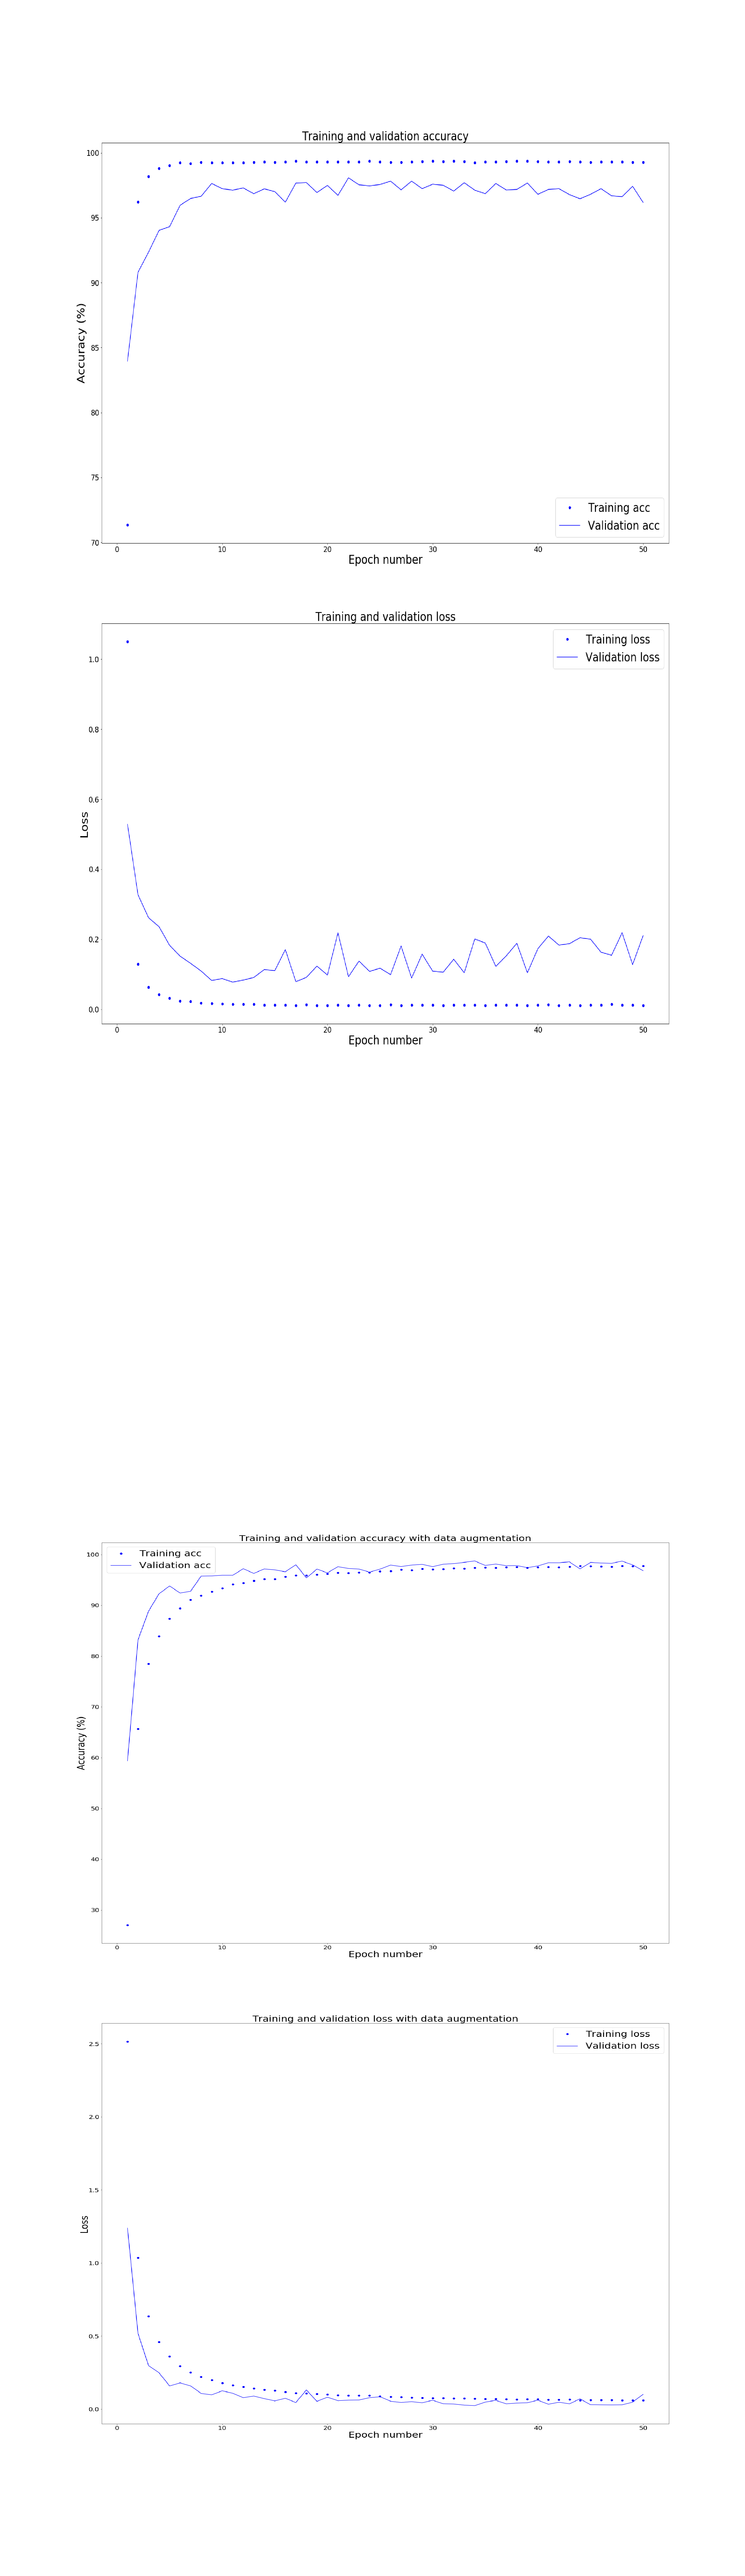

In [53]:
# First lets create figures for the new model

fg, (ax1, ax2) = plt.subplots(2,1,figsize = (30, 60)) # creating subplots

# calculating percentage accuracy for training and validation
acc = np.array(history.history['acc'])*100
val_acc = np.array(history.history['val_acc'])*100
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1) # calculating x-axis values
fnt = {'fontsize': 30,
       'fontweight' : 'medium',
       'verticalalignment': 'baseline'} # dictionary to control font for labels & title

# plotting accuracy with data augmentation
ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy with data augmentation', fnt)
ax1.set_xlabel('Epoch number', fnt, labelpad = 25)
ax1.set_ylabel('Accuracy (%)', fnt)
ax1.legend(fontsize = 30)

# plotting loss with data augmentation
ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss with data augmentation', fnt)
ax2.set_xlabel('Epoch number', fnt, labelpad = 25)
ax2.set_ylabel('Loss', fnt)
ax2.legend(fontsize = 30)

# changing font size of tick labels
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

fg.savefig('modelResultsAugmented.png')# saving the figure

# we can now close the figure as we have saved it
plt.close()

# Now we plot the save figures (with and with out data augmentation)
fg, (ax1, ax2) = plt.subplots(2,1,figsize = (50, 180)) # creating subplots
img_noaug = image.load_img('../input/kaggle-for-deep-learning-p-2-simple-convnet/modelResults.png') # reading saved image data from model 
# with out image augmentation
img_aug = image.load_img('modelResultsAugmented.png') # reading saved image data from model with image augmentation
ax1.imshow(img_noaug, aspect = 'auto')
ax1.axis('off')
ax2.imshow(img_aug, aspect = 'auto')
ax2.axis('off');
fg.savefig('modelAugmentedVsnonAugmented.png')

In [20]:
os.listdir('../input/kaggle-for-deep-learning-p-2-simple-convnet')

['fruit_classification_model.json',
 '__output__.json',
 'modelResults.png',
 'lossAfterEpoch10.png',
 '__results___files',
 'custom.css',
 '__results__.html',
 'fruit_classification_weights.h5']

## Insights from the plots
The following points are to be noted from the plots above ** we already observed these when we modelled the data with out data augmentation**: With out data augmentation: 
1. After epoch number 10, both the training accuracy and loss do not change alot.
2. The validation loss and accuracy never reach the traing loss and accuracy.
3. After epoch number 10, the validation loss seems to increase as the epoch number increases.   
    
But, the plots where we used data augmentation and added a drop out layer, we do not see the above mentioned points:   
1.  The validation loss and accuracy reach the values of training loss and accuracy.
2. The validation loss and accuracy remain stable as the number of epochs increase.   
    
In summary, with adding a drop out layer and using data augmentation we have resolved the potential overfitting problem.

To make sure that our observation of solving the overfitting problem, plot the loss vs epoch number using values starting from epoch number 10 and compare it to the plot that we had created with out using data augmentation..

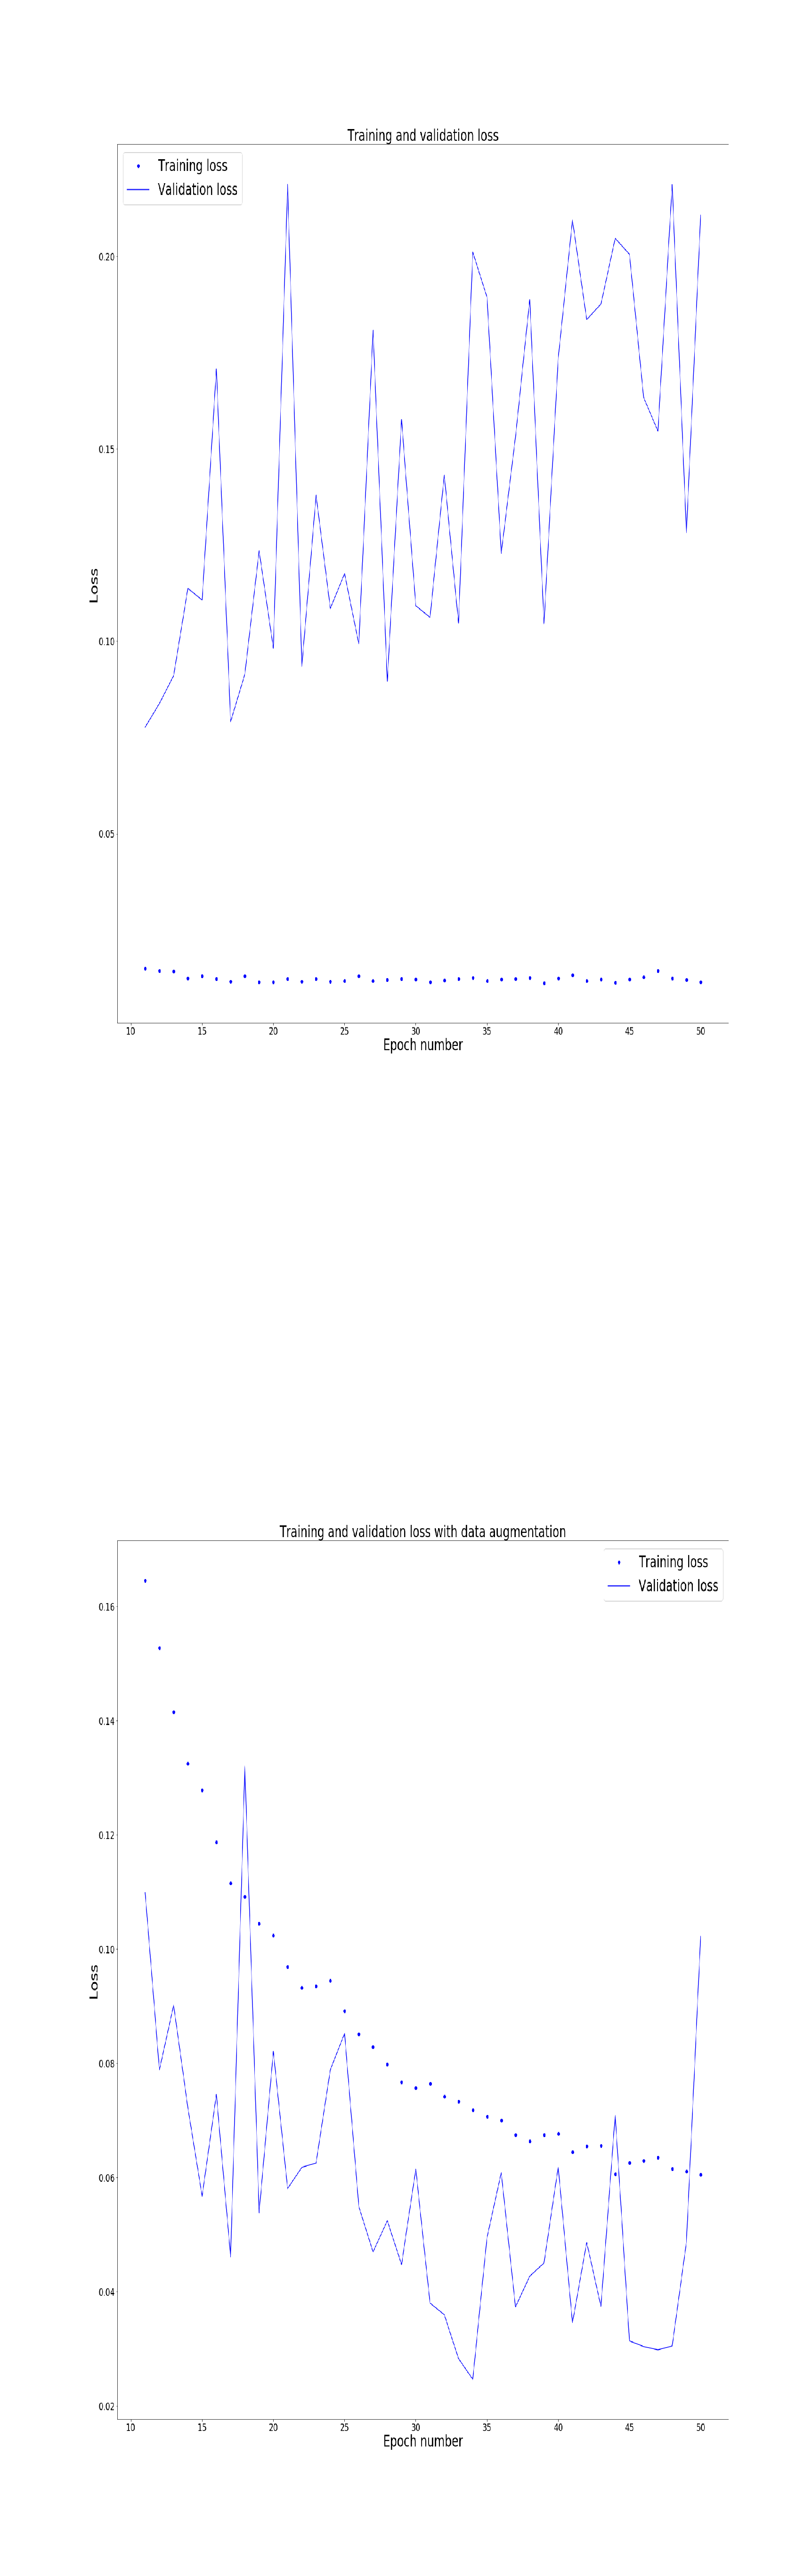

In [55]:
# Let's first create the plot
fg, ax = plt.subplots(1,1,figsize = (30, 30)) # creating figure and axis objects

# plotting loss after epoch no 10 using parameters already created before
ax.plot(epochs[10:], loss[10:], 'bo', label='Training loss')
ax.plot(epochs[10:], val_loss[10:], 'b', label='Validation loss')
ax.set_title('Training and validation loss with data augmentation', fnt)
ax.set_xlabel('Epoch number', fnt, labelpad = 25)
ax.set_ylabel('Loss', fnt)
ax.legend(fontsize = 30)

# changing font size of tick labels
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)

fg.savefig('lossAfterEpoch10Augmented.png')# saving the figure

# we can now close the figure as we have saved it
plt.close()

# Now we plot the save figures (with and with out data augmentation)
fg, (ax1, ax2) = plt.subplots(2,1,figsize = (30, 100)) # creating subplots
img_noaug = image.load_img('../input/kaggle-for-deep-learning-p-2-simple-convnet/lossAfterEpoch10.png') # reading saved image data from model 
# with out image augmentation
img_aug = image.load_img('lossAfterEpoch10Augmented.png') # reading saved image data from model with image augmentation
ax1.imshow(img_noaug, aspect = 'auto')
ax1.axis('off')
ax2.imshow(img_aug, aspect = 'auto')
ax2.axis('off');
fg.savefig('lossAfterEpoch10AugmentedVsnonAugmented.png')

As we had observed before, the validation loss with no data augmentation shows a slight but steady increase as epoch number increases.  Also, the validation loss is considerably higher than the training loss. **But when data augmentation is used the validation loss shows no increase as the number of epochs increase. Also, it's values remain very close to the training loss**.  In summary, adding a drop out layer and using data augmentation has improved our model. Now lets, print the validation accuracy for the las epoch.

In [56]:
print('Validation accuracy at the last epoch is: {} %'.format(val_acc[-1]))

Validation accuracy at the last epoch is: 96.77787934186472 %


## Model results 
The model gives us a validation accuaracy of 96.8%. The previous model gave us a validation accuracy of 96.6. 

## Testing the model
Now let's test the model on the test data set. As before we will generate batches of images for the test data. Then we will use 'evaluate_generator' method to calculate loss and accuracy for the test data.

In [57]:
# Creating the test_generator
test_generator = datagen.flow_from_directory(paths_list[2],
                                             target_size = (100,100),
                                             batch_size=dict_batchsize['Test'],
                                             class_mode='categorical')

Found 2888 images belonging to 69 classes.


In [58]:
test_loss, test_acc = model.evaluate_generator(test_generator,
                                               steps=dict_epochno['Test']) #
# calculating the test loss and accuracy
print('Test accuracy for the model is {} %'. format(test_acc*100)) # printing the test
# loss and accuracy

Test accuracy for the model is 96.05263212793751 %


## Model accuracy for test data
The model gives us an accuracy of 96.1 % on test data. The previous model gave us an accuracy of 96.2 %.

## Summarizing important results
1. Validation loss stays steady as epoch number increases .
2. Validation loss and accuracy reach the values very close to training loss and accuracy.
3. We are not overfitting the data.
4. The accuracy on the training data set and validation data set is around 96.8 and 96.1 %.

Finally we need to check the contents of the current directory. The contents of this directory will be saved as output. Lets remove files which we do not need as the output.

In [60]:
os.listdir()

['lossAfterEpoch10AugmentedVsnonAugmented.png',
 'modelAugmentedVsnonAugmented.png',
 '__notebook_source__.ipynb',
 'working',
 'lossAfterEpoch10Augmented.png',
 '.ipynb_checkpoints',
 'augmentedImages.png',
 'modelResultsAugmented.png']

We see that we have all the images from the input (that we unzipped) in the working directory. We do not need these as we already have saved them before, so let's remove them. 

In [23]:
shutil.rmtree('working')

This will be the last part of this project. The model saved in the output can now be used to predict the class of a fruit. Moreover, if new classes of fruits are added in the data set the model can be updated by freezing a part of it and updating it's weights by training the new images on the semi-frozen model.